In [663]:
from scipy import stats

from scipy.stats import entropy
from numpy.linalg import norm
import numpy as np

def jensenshannon(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family']      = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 33})
matplotlib.rc('xtick', labelsize = 30) 
matplotlib.rc('ytick', labelsize = 30) 
matplotlib.rc('text', usetex = False)

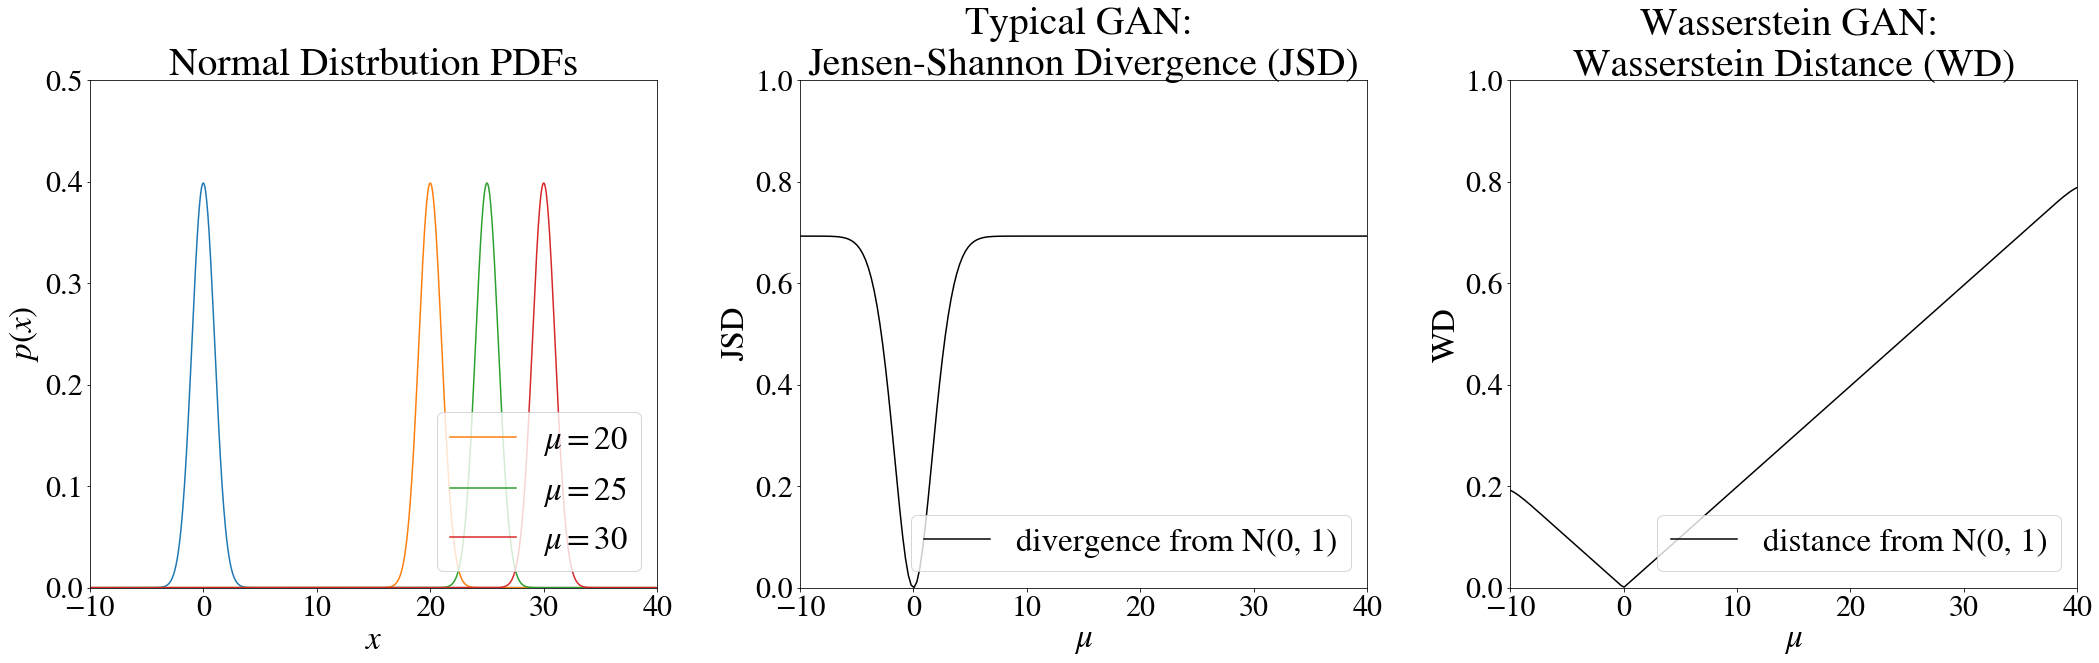

In [664]:
xlim = [-10, 40]
x    = np.linspace(*xlim, 200)
locs = [20, 25, 30]
lcd  = {locs[j] : plt.rcParams['axes.prop_cycle'].by_key()['color'][j + 1] for j in range(len(locs))}

figsize_13 = (30, 10)
fig, axs = plt.subplots(1, 3, figsize = figsize_13)

# Plot pdfs
pdfd = {}
x_2 = np.linspace(*xlim, 1000)
pdfd[-1] = stats.norm.pdf(x_2, 0)
axs[0].plot(x_2, pdfd[-1])
for j, loc in enumerate(locs):
    pdfd[j] = stats.norm.pdf(x_2, loc)
    axs[0].plot(x_2, stats.norm.pdf(x_2, loc), label = '$\mu = {}$'.format(loc))
axs[0].legend(loc = 'lower right')
axs[0].set_title('Normal Distrbution PDFs')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$p(x)$')

    
    
# PLot JS - divergences
jsd = np.zeros(x.shape)
pdf_0 = stats.norm.pdf(x, 0)
for j, loc in enumerate(x):
    pdf_loc = stats.norm.pdf(x, loc)
    jsd[j]  = jensenshannon(pdf_0, pdf_loc)
axs[1].plot(x, jsd, color = 'k', label = 'divergence from N(0, 1)')
axs[1].set_title('Typical GAN: \nJensen-Shannon Divergence (JSD)')
axs[1].set_xlabel('$\mu$')
axs[1].set_ylabel('JSD')
axs[1].legend(loc = 'lower right')



# PLot EM - distances
emd = np.zeros(x.shape)
cdf_0 = stats.norm.cdf(x, 0)
for j, loc in enumerate(x):
    cdf_loc = stats.norm.cdf(x, loc)
    emd[j]  = stats.wasserstein_distance(cdf_0, cdf_loc)
axs[2].plot(x, emd, color = 'k', label = 'distance from N(0, 1)')
axs[2].set_title('Wasserstein GAN: \nWasserstein Distance (WD)')
axs[2].set_xlabel('$\mu$')
axs[2].set_ylabel('WD')
axs[2].legend(loc = 'lower right')


fig.tight_layout() 

for i in range(3):
    axs[i].set_xlim(*xlim)
    
axs[0].set_ylim(*[0, 0.5]);
axs[1].set_ylim(*[0, 1.0]);
axs[2].set_ylim(*[0, 1.0]);

fig.savefig('WD_vs_JSD.png')

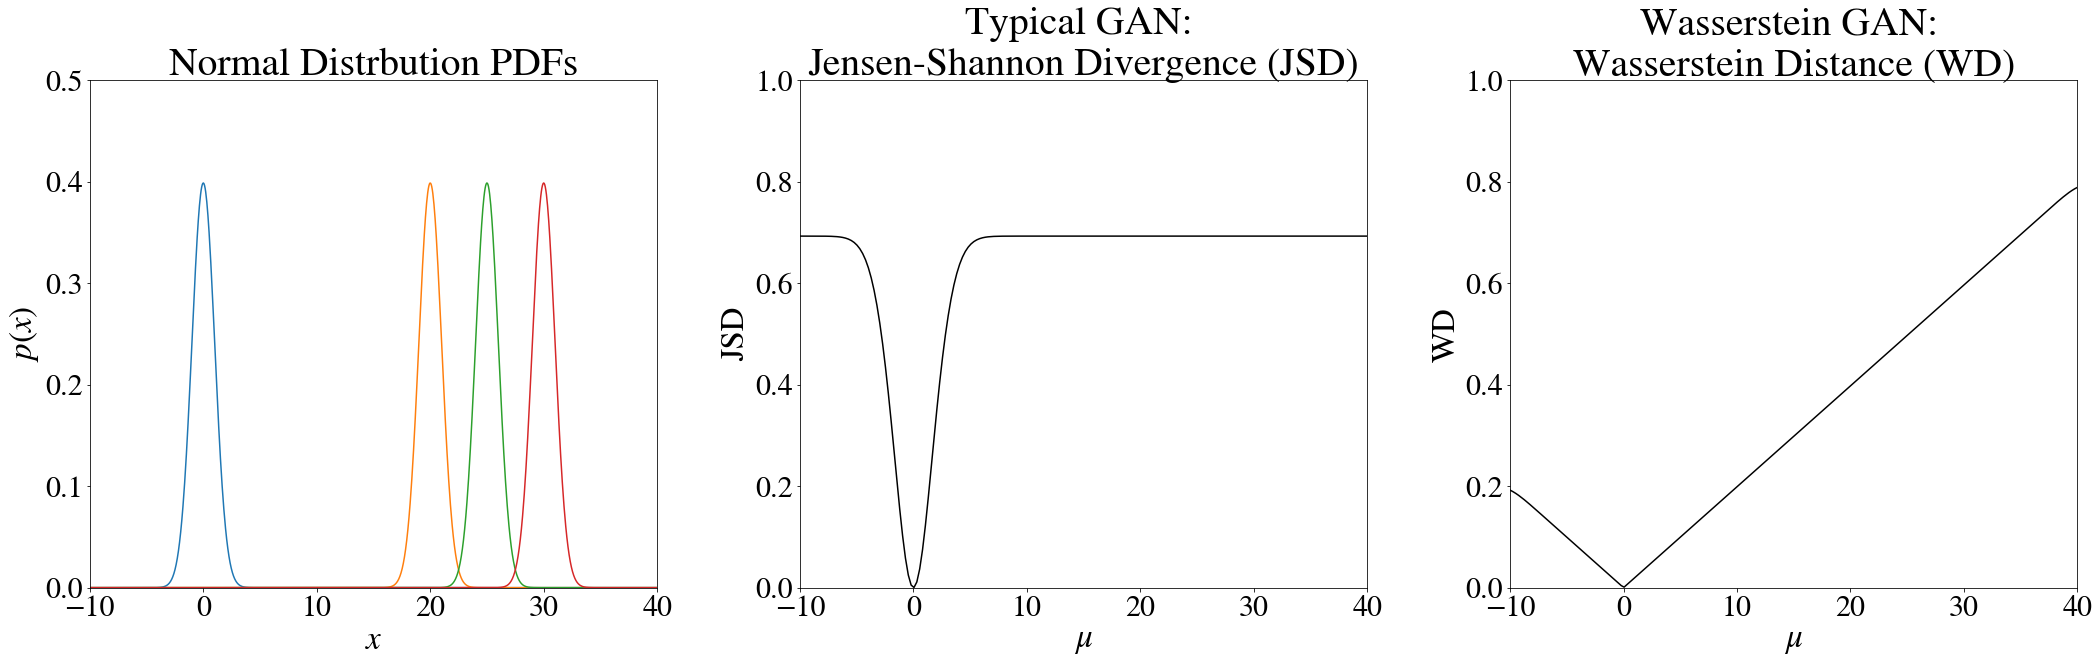

In [11]:
xlim = [-10, 40]
x    = np.linspace(*xlim, 200)
locs = [20, 25, 30]
lcd  = {locs[j] : plt.rcParams['axes.prop_cycle'].by_key()['color'][j + 1] for j in range(len(locs))}

figsize_13 = (30, 10)
fig, axs = plt.subplots(1, 3, figsize = figsize_13)

# Plot pdfs
pdfd = {}
x_2 = np.linspace(*xlim, 1000)
pdfd[-1] = stats.norm.pdf(x_2, 0)
axs[0].plot(x_2, pdfd[-1])
for j, loc in enumerate(locs):
    pdfd[j] = stats.norm.pdf(x_2, loc)
    axs[0].plot(x_2, stats.norm.pdf(x_2, loc), label = '$\mu = {}$'.format(loc))
# axs[0].legend(loc = 'lower right')
axs[0].set_title('Normal Distrbution PDFs')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$p(x)$')

    
    
# PLot JS - divergences
jsd = np.zeros(x.shape)
pdf_0 = stats.norm.pdf(x, 0)
for j, loc in enumerate(x):
    pdf_loc = stats.norm.pdf(x, loc)
    jsd[j]  = jensenshannon(pdf_0, pdf_loc)
axs[1].plot(x, jsd, color = 'k', label = 'divergence from N(0, 1)')
axs[1].set_title('Typical GAN: \nJensen-Shannon Divergence (JSD)')
axs[1].set_xlabel('$\mu$')
axs[1].set_ylabel('JSD')
# axs[1].legend(loc = 'lower right')



# PLot EM - distances
emd = np.zeros(x.shape)
cdf_0 = stats.norm.cdf(x, 0)
for j, loc in enumerate(x):
    cdf_loc = stats.norm.cdf(x, loc)
    emd[j]  = stats.wasserstein_distance(cdf_0, cdf_loc)
axs[2].plot(x, emd, color = 'k', label = 'distance from N(0, 1)')
axs[2].set_title('Wasserstein GAN: \nWasserstein Distance (WD)')
axs[2].set_xlabel('$\mu$')
axs[2].set_ylabel('WD')
# axs[2].legend(loc = 'lower right')


fig.tight_layout() 

for i in range(3):
    axs[i].set_xlim(*xlim)
    
axs[0].set_ylim(*[0, 0.5]);
axs[1].set_ylim(*[0, 1.0]);
axs[2].set_ylim(*[0, 1.0]);

fig.savefig('WD_vs_JSD_nolegend.png')

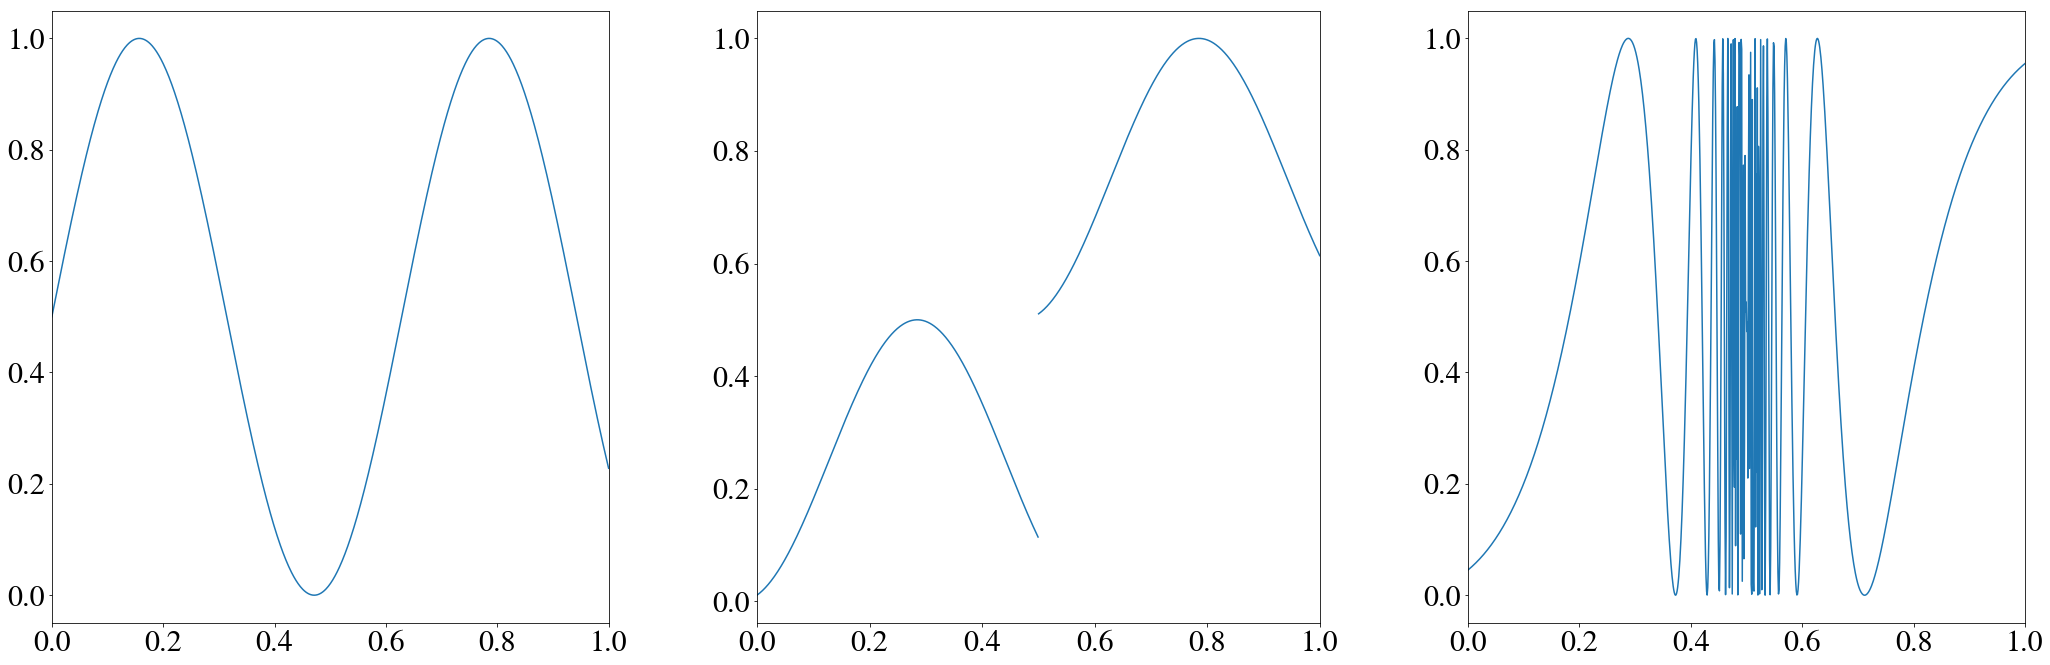

In [96]:
figsize_13 = (40, 14)
fig, axs = plt.subplots(1, 3, figsize = (30, 10))
x0 = 0
m  = 1
x  = np.linspace(x0, m, 1000)

def f1(x):
    return 0.5 * np.sin(x*10) + 0.5

def f2a(x):
    x1, x2 = np.split(x, 2)
    y1     = 0.5 * f1(x2)
    return x1, y1

def f2b(x):
    x1, x2 = np.split(x, 2)
    y2     = 0.5 * f1(x2) + 0.5
    return x2, y2

def f3(x):
    return 0.5 * np.sin(1 / (x-m/2)) + 0.5

axs[1].set_aspect('equal', 'box')
axs[2].set_aspect('equal', 'box')

axs[0].plot(x, f1(x));
axs[1].plot(*f2a(x));
axs[1].plot(*f2b(x), color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]);
axs[2].plot(x, f3(x));

axs[0].set_aspect('equal', 'box')
axs[0].set_xlim(x0, m)

axs[1].set_aspect('equal', 'box')
axs[1].set_xlim(x0, m)

axs[2].set_aspect('equal', 'box')
axs[2].set_xlim(x0, m)

fig.tight_layout() 

fig.savefig('1lipschitz_illustration.png')

In [10]:
gm.SG_train.get_indices(range(0,2)).x.shape

(2, 400, 3)

(<Figure size 2880x720 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A107BC5278>,
       dtype=object))

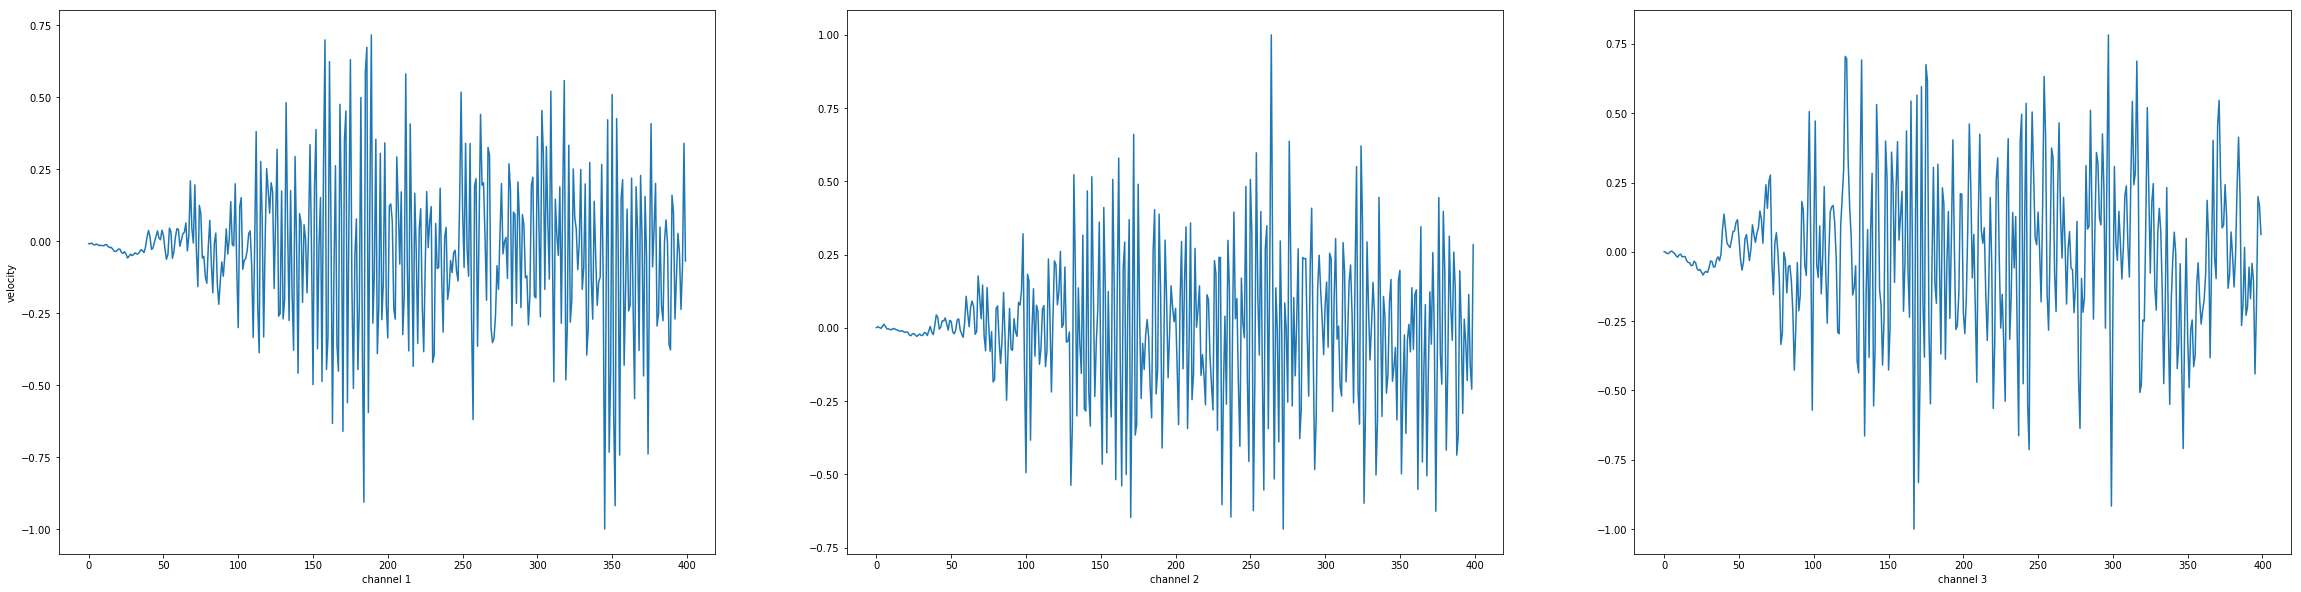

In [13]:
wf  = gm.data.wform
wfd = gm.data.metad['dist'] 
idx = np.argmax(wfd)
w1 = gm.SG_train.get_indices(range(idx, idx + 1)).x
# w1 = wf[..., idx].transpose((1, 0))[None, :, :]
plot_wforms(w1)

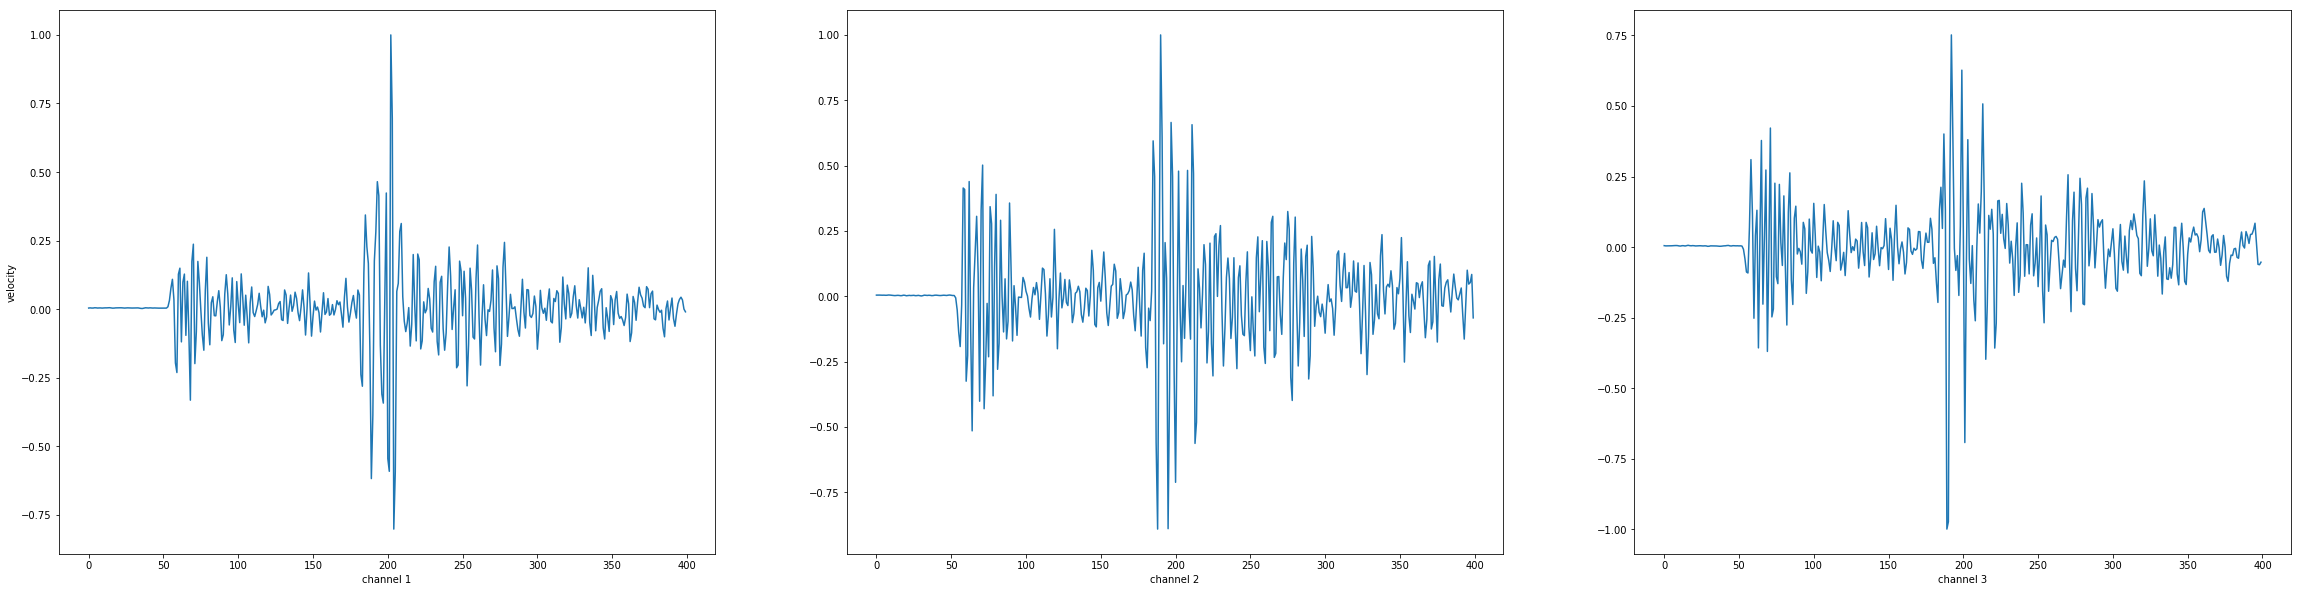

In [46]:
np.random.seed(7)
wf  = gm.data.wform
wfd = gm.data.metad['dist'] 
idx = np.argmin(wfd)
idx = np.random.choice(gm.data.wform.shape[-1])

w1 = gm.SG_train.get_indices(range(idx, idx + 1)).x
# w1 = wf[..., idx].transpose((1, 0))[None, :, :]
fig, axs = plot_wforms(w1)
fig.savefig('example_wforms.png')

In [21]:
wfd[idx]

51.82959747314453

In [23]:
gm.data.metad['magn'][idx]

4.830838203430176

In [25]:
import seaborn as sns

<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

In [1111]:
np.histogram(gm.metas[1], bins = [0, 4, 5, 6, 7, 8, 9])[0]/gm.metas[1].shape[0]

array([0.0504901 , 0.58236183, 0.25869752, 0.09330276, 0.01287371,
       0.0009894 ])

In [1119]:
p = np.array([100 / (np.power(4, j)) for j in range(7)])
p = p / np.sum(p)
['{:0.2f}'.format(p[i]*100) for i in range(len(p))]

['75.00', '18.75', '4.69', '1.17', '0.29', '0.07', '0.02']

In [1189]:
H[3, 6]

289.0

In [27]:
# Cpnstruct hist from bins.
print([m.shape for m in gm.metas])
print([b.shape for b in gm.bins])
H, _     = np.histogramdd(gm.metas, bins = gm.bins)
H_scaled = np.divide(1, H, out = np.zeros_like(H).astype(np.float32), where = H != 0)
H_scaled = H_scaled / (np.sum(H_scaled))

[(260764,), (260764,)]
[(11,), (8,)]


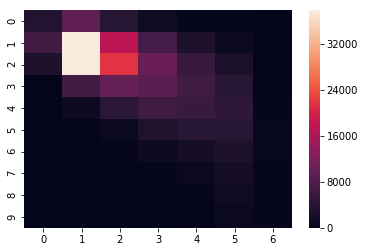

In [44]:
ax = sns.heatmap(H)
fig = ax.get_figure()
fig.savefig("bins_heat_map.png")

In [35]:
b1a = list(gm.bins[1][:-1])
b1b = list(gm.bins[1][1:-1]) + ['']

[str(s1) + '-' + str(s2) for s1, s2 in zip(b1a, b1b)]

['3.0-4.0', '4.0-4.5', '4.5-5.0', '5.0-5.5', '5.5-6.0', '6.0-7.0', '7.0-']

In [45]:
b1a = list(gm.bins[0][:-1])
b1b = list(gm.bins[0][1:-1]) + ['']

[str(s1) + '-' + str(s2) for s1, s2 in zip(b1a, b1b)]

['4.064348220825195-43.6569917678833',
 '43.6569917678833-83.2496353149414',
 '83.2496353149414-122.8422788619995',
 '122.8422788619995-162.4349224090576',
 '162.4349224090576-202.02756595611572',
 '202.02756595611572-241.6202095031738',
 '241.6202095031738-281.2128530502319',
 '281.2128530502319-320.80549659729',
 '320.80549659729-360.39814014434813',
 '360.39814014434813-']

## Earthquake size

In [665]:
import plotly.plotly as py
import plotly.tools as tls

ModuleNotFoundError: No module named 'plotly'

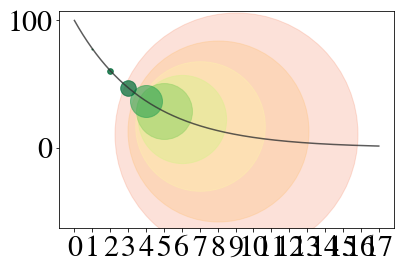

In [750]:
F1 = 100
def f(x):
    return F1*np.exp(-.25*x)
x = np.linspace(0.0001, 17, 1000)

def g(m):
    return np.power(m, 5) # power of an earthquake
ms = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

fig, ax = plt.subplots(1, 1)
# ax.set_xticklabels(ms)

ax.plot(x, f(x), color = [0.2, 0.2, 0.2], alpha = 0.8)
colors = plt.get_cmap('RdYlGn')(np.flip(np.linspace(0.2, 1.25, len(ms))))
alphas = np.flip(np.linspace(0.2, 0.9, len(ms)))
for m, f_m, g_m, e_c, f_c, a_l in reversed(list(zip(ms, f(ms), g(ms), colors, colors, alphas))):
    ax.scatter(m, f_m, s = g_m, edgecolor = e_c, facecolor = f_c, alpha = a_l)
    
import matplotlib.ticker as plticker

# ax.set_xlim([0,10])
# ax.set_ylim([-F1 / 5, F1])
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)


In [672]:
np.power(10, np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

array([        10,        100,       1000,      10000,     100000,
          1000000,   10000000,  100000000, 1000000000], dtype=int32)

In [696]:
plt.get_cmap('RdYlGn')(np.flip(np.linspace(0, 1, len(ms))))

array([[0.        , 0.40784314, 0.21568627, 1.        ],
       [0.16624375, 0.62737409, 0.32979623, 1.        ],
       [0.51810842, 0.7928489 , 0.4011534 , 1.        ],
       [0.79607843, 0.9135717 , 0.50957324, 1.        ],
       [0.99707805, 0.9987697 , 0.74502115, 1.        ],
       [0.99515571, 0.83229527, 0.50634371, 1.        ],
       [0.97485582, 0.557401  , 0.32272203, 1.        ],
       [0.87212611, 0.24921184, 0.18093041, 1.        ],
       [0.64705882, 0.        , 0.14901961, 1.        ]])

In [695]:
np.flip(np.linspace(0, 1, 3))

array([1. , 0.5, 0. ])

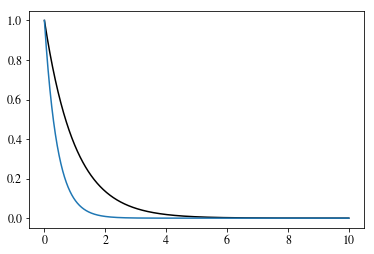

In [825]:
fig, ax = plt.subplots(1, 1)

def f(x):
    return np.exp(-x)
xs = np.linspace(0, 10, 1000)

ax.plot(xs, f(xs), color = 'k')
ax.plot(xs, np.exp(-1.4 * x))

fig.savefig('expcurve.svg', format = 'svg')

In [836]:
np.fft.fft(0.5*np.ones((1, 5)))

array([[2.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]])

In [831]:
np.fft.fftfreq(10, 1/10)

array([ 0.,  1.,  2.,  3.,  4., -5., -4., -3., -2., -1.])